In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [2]:
# Reading the file
df = pd.read_csv("data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Overall view of the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
#Checking null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
# dropping the id and unnamed32 columms as they are not required
df.drop(df.columns[[0,-1]], axis=1, inplace=True)

In [8]:
# columns id and unnamed32 is dropped
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
# Target Variable:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

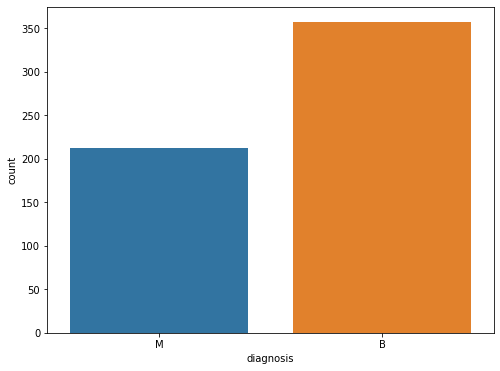

In [10]:
# Showing the number of Benign and Malignant Breast cancers diagnosis in the dataset.
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df)

In [11]:
s = pd.value_counts(df.diagnosis)
# for class 0
num_of_benign = s[0]
# for class 1
num_of_malignant = s[1]

total_cases = len(df)
# calculate percentages of data that resides in both classes
percent_b = num_of_benign / total_cases
percent_m = num_of_malignant / total_cases

print(f'Percent Benign: {percent_b}\nPercent Malignant: {percent_m}')


Percent Benign: 0.6274165202108963
Percent Malignant: 0.37258347978910367


In [12]:
# Binarizing the target variable by mapping to value 1 for Malignant and 0 for Benign
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [13]:
# Checking the value for Target variable again
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [15]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [16]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [18]:
data_mean = df[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

In [19]:
data_mean

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


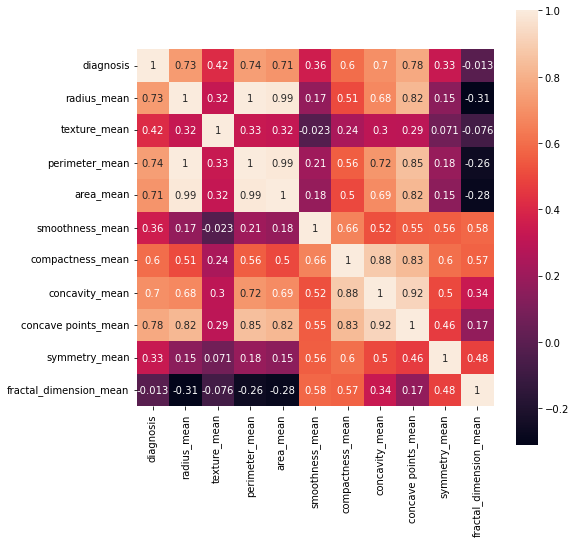

In [20]:
#We will just see how these features coorelate with the diagnosis using heatmap:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
foo = sns.heatmap(data_mean.corr(), vmax=1, square=True, annot=True)

### We will use radius_mean, perimeter_mean, area_mean, compactness_mean, concavity_mean, concave points_mean as our main columns because they have higher co-relation with the target variable and eliminate other columns to reduce dimensionality.

## Outlier Detection and Treatment

In [21]:
num_cols = ['concave points_mean','area_mean','radius_mean','perimeter_mean','concavity_mean']
X = df[num_cols].copy()
X.head()

,concave points_mean,area_mean,radius_mean,perimeter_mean,concavity_mean
0,0.14710,1001.0,17.99,122.80,0.3001
1,0.07017,1326.0,20.57,132.90,0.0869
2,0.12790,1203.0,19.69,130.00,0.1974
3,0.10520,386.1,11.42,77.58,0.2414
4,0.10430,1297.0,20.29,135.10,0.1980


### Outlier Detection

concave points_mean       AxesSubplot(0.125,0.657941;0.227941x0.222059)
area_mean              AxesSubplot(0.398529,0.657941;0.227941x0.222059)
radius_mean            AxesSubplot(0.672059,0.657941;0.227941x0.222059)
perimeter_mean            AxesSubplot(0.125,0.391471;0.227941x0.222059)
concavity_mean         AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtype: object

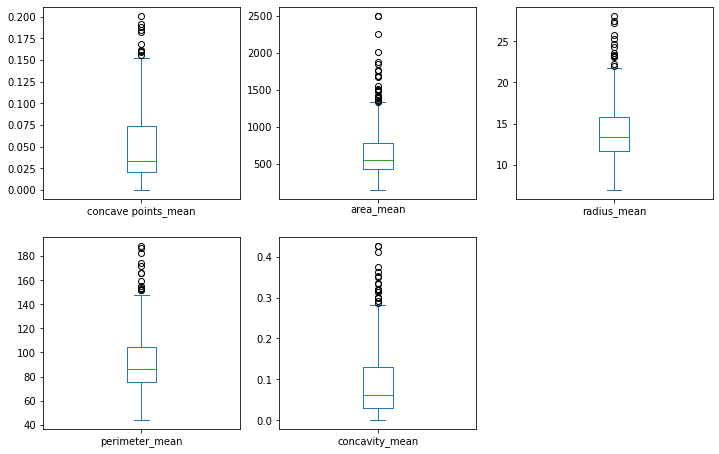

In [22]:
#using box plot
X.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True)

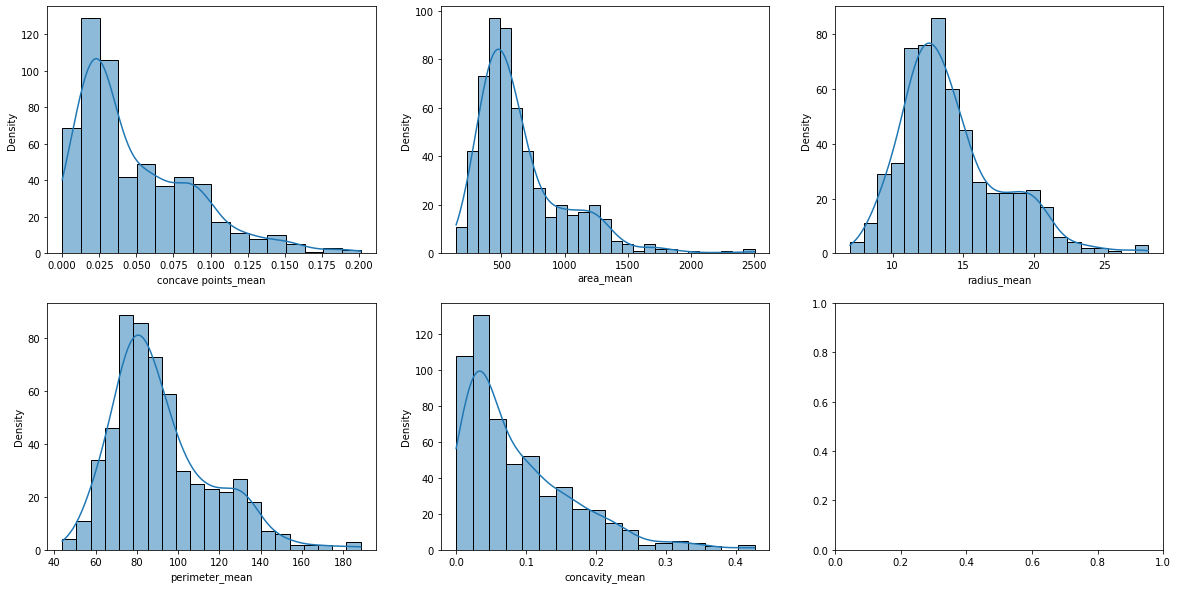

In [23]:
rows = 2
cols = 3
index = 0
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 10))
for i in range(rows):
    for j in range(cols):
        if index > 4:
            break
        dist = sns.histplot(x=df[num_cols[index]], ax=ax[i][j], kde=True)
        dist.set(xlabel=num_cols[index], ylabel="Density")
        index = index + 1

### Outlier Identification using IQR

In [24]:
# Calculating IQR Range for numerical columns

def calIQR(dataframe, col):
    q1 = np.percentile(dataframe[col], 25)
    q3 = np.percentile(dataframe[col], 75)
    iqr = q3 - q1
    print(f"IQR for column {col} is {iqr}")
    # calculating range for colum
    Q1 = q1 - 1.5 * iqr
    Q3 = q3 + 1.5* iqr
    print(f"Threashold Range for column {col} where lower limit Q1 = {Q1} and upper limit Q3 = {Q3}")
    
    outliers_poss = []
    for index, x in enumerate(dataframe[col]):
        if x <= Q1 or x >= Q3:
            outliers_poss.append(index)
    print(f"Total no of outliers for {col} are",len(outliers_poss))   
#   lower = dataframe[col]<=Q1
#   upper = dataframe[col]>=Q3
#   print(f"outliers in lower limit for {col} are %f " % np.where(lower))
#   print(f"outliers in upper limit for {col} are %f " % np.where(upper))
    print("*"*100)

In [25]:
for x in num_cols:
    calIQR(df, x)

IQR for column concave points_mean is 0.053689999999999995
Threashold Range for column concave points_mean where lower limit Q1 = -0.060224999999999994 and upper limit Q3 = 0.15453499999999998
Total no of outliers for concave points_mean are 10
****************************************************************************************************
IQR for column area_mean is 362.40000000000003
Threashold Range for column area_mean where lower limit Q1 = -123.30000000000001 and upper limit Q3 = 1326.3000000000002
Total no of outliers for area_mean are 25
****************************************************************************************************
IQR for column radius_mean is 4.08
Threashold Range for column radius_mean where lower limit Q1 = 5.579999999999999 and upper limit Q3 = 21.9
Total no of outliers for radius_mean are 14
****************************************************************************************************
IQR for column perimeter_mean is 28.929999999999993
Thre

### Outliers Treatment

In [26]:
#Flooring and Capping method for outliers removal
def call_floor_capp(dataframe, col):
    q10 = df[col].quantile(0.10)
    q90 = df[col].quantile(0.90)
    print(f"10th percentile for {col} is {q10}")
    print(f"90th percentile for {col} is {q90}")
    return q10,q90

In [27]:
for x in num_cols:
    q10, q90 = call_floor_capp(df, x)
    X[x] = np.where(X[x] <q10, q10,X[x])
    X[x] = np.where(X[x] >q90, q90,X[x])
    print(f'Skew of column {x} is {df[x].skew()}')
    print("*"*100)

10th percentile for concave points_mean is 0.011158
90th percentile for concave points_mean is 0.10042
Skew of column concave points_mean is 1.1711800812336282
****************************************************************************************************
10th percentile for area_mean is 321.6
90th percentile for area_mean is 1177.3999999999999
Skew of column area_mean is 1.6457321756240424
****************************************************************************************************
10th percentile for radius_mean is 10.26
90th percentile for radius_mean is 19.53
Skew of column radius_mean is 0.9423795716730992
****************************************************************************************************
10th percentile for perimeter_mean is 65.83
90th percentile for perimeter_mean is 129.1
Skew of column perimeter_mean is 0.9906504253930081
****************************************************************************************************
10th percentile for concavi

concave points_mean       AxesSubplot(0.125,0.657941;0.227941x0.222059)
area_mean              AxesSubplot(0.398529,0.657941;0.227941x0.222059)
radius_mean            AxesSubplot(0.672059,0.657941;0.227941x0.222059)
perimeter_mean            AxesSubplot(0.125,0.391471;0.227941x0.222059)
concavity_mean         AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtype: object

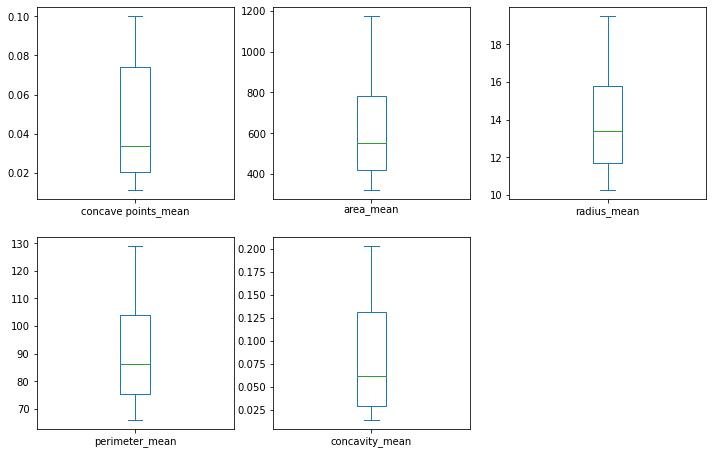

In [28]:
#using box plot
X.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True)

#### Now we can see that our dataset have zero outliers.

## Training and Evaluating dataset with RandomForestClassifer

In [29]:
# Created a method to show stats
def stats(y_test, y_pred):
    #Creating confusion matrix
    matrix = confusion_matrix(y_test,y_pred)
    # Plotting the Confusion Matrix
    sns.set(rc={"figure.figsize":(8, 6)})
    ax = sns.heatmap(matrix, annot=True, cmap='Blues',fmt='g')
    ax.set_title('Confusion Matrix');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    plt.show()
    print(classification_report(y_test, y_pred))
    print(f'Accuracy of the model = {accuracy_score(y_test,y_pred)*100}%')

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=43)
print('Shape training set: X:{}, y:{}'.format(X_train.shape, y_train.shape))
print('Shape test set: X:{}, y:{}'.format(X_test.shape, y_test.shape))

Shape training set: X:(398, 5), y:(398,)
Shape test set: X:(171, 5), y:(171,)


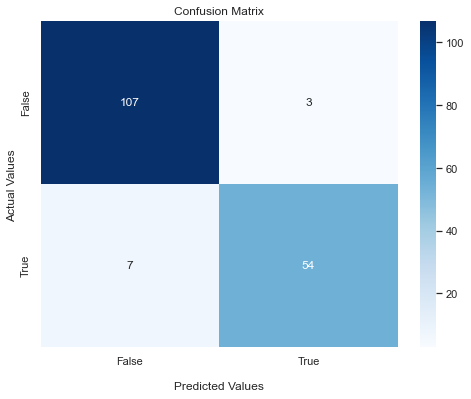

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       110
           1       0.95      0.89      0.92        61

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

Accuracy of the model = 94.15204678362574%


In [31]:
# imports the random forest from the Sklearn library
rfc = RandomForestClassifier()
# and fits a random forest to a set of testing data
rfc.fit(X_train, y_train)
# predicting the testing data
y_pred = rfc.predict(X_test)
#When the random forest was training using the partitioned training and testing data, the result was as follows:
stats(y_pred,y_test)

In [32]:
# Saving our model
joblib.dump(rfc,"cancer_model.joblib")

['cancer_model.joblib']